470


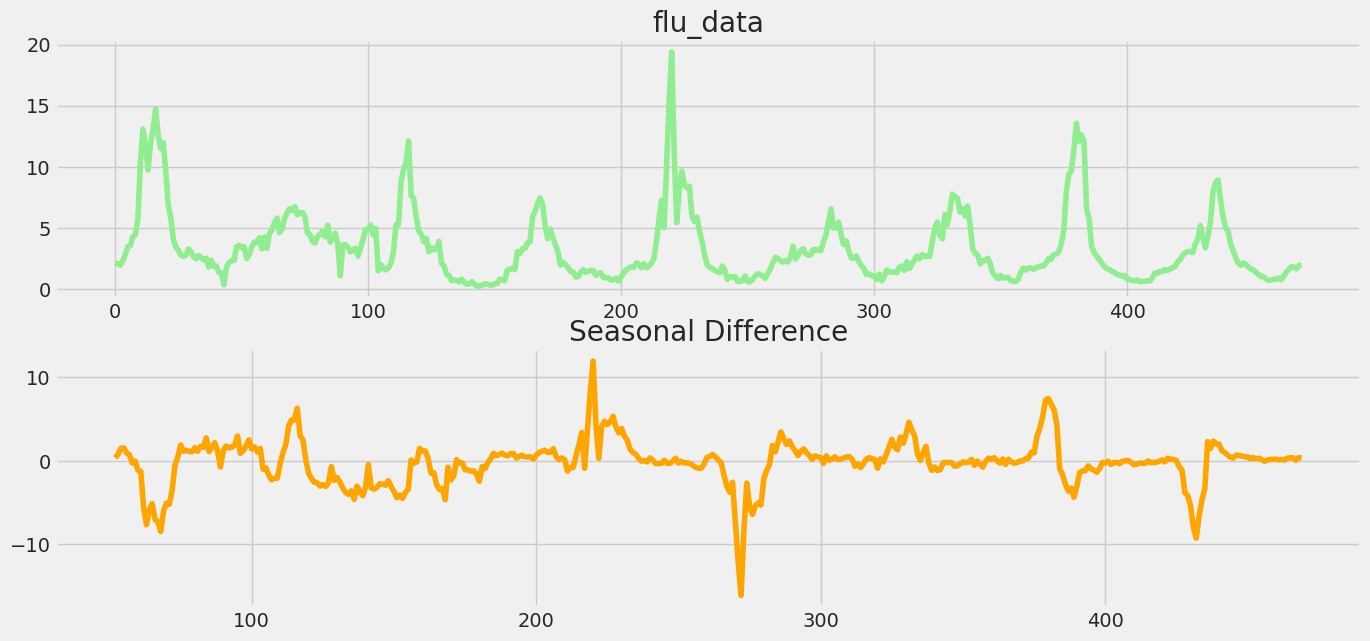

           0
52   0.36009
53   0.76809
54   1.48316
55   1.55746
56   0.96044
..       ...
465  0.36453
466  0.37230
467  0.06846
468  0.39398
469  0.34738

[418 rows x 1 columns]


In [34]:
#在kaggle平台的Jupyter Notebook上完成编程和模型训练
#SARIMA模型
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
path='/kaggle/input/flu-al/data_flu.csv'
flu_data = pd.read_csv(path, header=None)
print(len(flu_data))

#按照季节差分
period=52

flu_dif_seasonal  = flu_data.diff(period) #差分


# Show data
#图像绘制
plt.figure(figsize=(15,7))
# 原始数据图表
plt.subplot(2, 1, 1)
plt.title('flu_data')
plt.plot(flu_data,color="lightgreen")


# 按照季节差分图表
plt.subplot(2, 1, 2)
plt.plot(flu_dif_seasonal, color='orange')
plt.title('Seasonal Difference')


plt.show()

#去掉NaN
flu_dif_seasonal = flu_dif_seasonal.dropna()
print(flu_dif_seasonal)

In [35]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#flu_dif1 = flu_dif1.fillna(0)
#flu_dif2 = flu_dif2.fillna(0)

#ADF检验
print(type(flu_data))
timeseries_adf = ADF(flu_data)
timeseries_diff_seasonal_adf = ADF(flu_dif_seasonal)


# 打印单位根检验结果
print('timeseries_adf : ', timeseries_adf)
print('timeseries_diff_seasonal_adf : ', timeseries_diff_seasonal_adf)

<class 'pandas.core.frame.DataFrame'>
timeseries_adf :  (-5.748324040430326, 6.048161119389069e-07, 5, 464, {'1%': -3.4445220811896657, '5%': -2.8677891615873192, '10%': -2.5700985643950656}, 1253.1083698186271)
timeseries_diff_seasonal_adf :  (-6.042108168864625, 1.3383368085317323e-07, 4, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, 1308.830508471115)


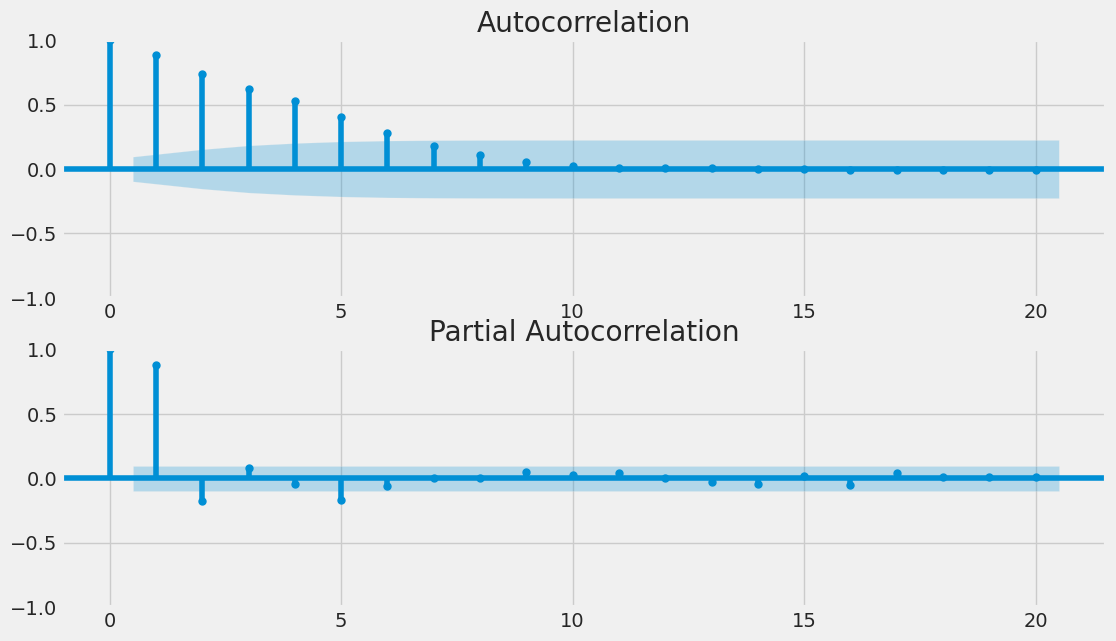

In [36]:
#图检验，ACF、PACF
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(flu_dif_seasonal, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom') # 设置坐标轴上的数字显示的位置，top:显示在顶部  bottom:显示在底部

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(flu_dif_seasonal, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')

plt.show()

In [46]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pdb
import warnings
warnings.filterwarnings('ignore')

file='/kaggle/input/flu-data/ILINet.csv'
df = pd.read_csv(file,  usecols=['YEAR', 'WEEK', 'ILI%'])
print(df)

# 1. 创建 'date' 列，将 year 和 week 组合为日期（每周从周日开始）
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + df['WEEK'].astype(str).str.zfill(2) + '0', format='%Y%U%w')

#修改date中重复的日期，2014年第52周和第53周，对应的日期都是2014-12-28
df.iloc[221, 3] = pd.to_datetime('2014-12-31')  # 修改日期列


# 2. 将 'date' 列设置为索引
df.set_index('date', inplace=True)

# 3. 提取 ILI% 列为 pandas.Series
ts = df['ILI%']

# 打印结果
print(ts)

     YEAR  WEEK     ILI%
0    2010    40  2.13477
1    2010    41  2.05999
2    2010    42  1.94224
3    2010    43  2.27650
4    2010    44  2.83371
..    ...   ...      ...
465  2019    36  1.81117
466  2019    37  1.80076
467  2019    38  1.66527
468  2019    39  1.91817
469  2019    40  1.97633

[470 rows x 3 columns]
date
2010-10-03    2.13477
2010-10-10    2.05999
2010-10-17    1.94224
2010-10-24    2.27650
2010-10-31    2.83371
               ...   
2019-09-08    1.81117
2019-09-15    1.80076
2019-09-22    1.66527
2019-09-29    1.91817
2019-10-06    1.97633
Name: ILI%, Length: 470, dtype: float64


date
2010-10-03    2.13477
2010-10-10    2.05999
2010-10-17    1.94224
2010-10-24    2.27650
2010-10-31    2.83371
               ...   
2019-09-08    1.81117
2019-09-15    1.80076
2019-09-22    1.66527
2019-09-29    1.91817
2019-10-06    1.97633
Name: ILI%, Length: 470, dtype: float64
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
                                      SARIMAX Results                                       
Dep. Variable:                                 ILI%   No. Observations:                  376
Model:             SARIMAX(4, 0, 2)x(0, 1, [1], 52)   Log Likelihood                -478.032
Date:                              Sat, 12 Oct 2024   AIC                            972.064
Time:                                      12:40:

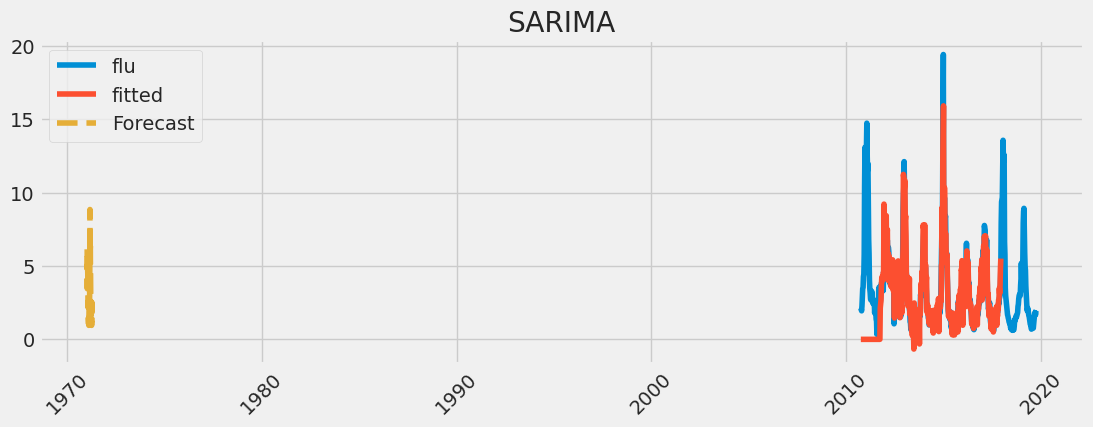

In [59]:
def find_pq_PQ(ts, m, d, D, max_p=5, max_q=5, max_P=2, max_Q=2):
    best_p, best_q = 0, 0
    best_P, best_Q = 0, 0
    best_aic = np.inf
    cnt=0
    for p in range(max_p):
        for q in range(max_q):
            for P in range(max_P):
                for Q in range(max_Q):
                    model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, m)).fit(disp=-1)
                    aic = model.aic
                    cnt=cnt+1
                    print(cnt)

                    if aic < best_aic:
                        best_aic = aic
                        best_p = p
                        best_q = q
                        best_P = P
                        best_Q = Q

    return best_p, best_q, best_P, best_Q, best_aic

def version_sarima_with_manual(ts):
    """
    SARIMA（statsmodels）
    """
    # 不提前做季节差分，让D=1

    # 周期大小
    periods = 52

    # 数据拆分
    train, test = train_test_split(ts, train_size=0.8)

    # 模型训练
    d, D = 0, 1
    p, q, P, Q, _ = find_pq_PQ(ts, periods, d=d, D=D)
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, periods)).fit(disp=-1)
    print(model.summary())

    # 拟合结果
    fitted = model.fittedvalues

    # 模型预测
    fcst = model.forecast(test.shape[0])

    # 模型评估
    rmse = np.sqrt(mean_squared_error(test, fcst))
    print('RMSE: %.4f' % rmse)

    # 可视化
    plt.figure(figsize=(12, 4))
    # ts.plot(label='flu')
    # fitted.plot(label='fitted')
    # fcst.plot(label='forecast',linestyle='--')
    # plt.legend()
    # plt.grid(True)

    plt.plot(ts.index, ts, label='flu')
    plt.plot(fitted.index, fitted, label='fitted')
    plt.plot(fcst.index, fcst, label='Forecast', linestyle='--')
    # plt.plot(predict_sunspots, label='Fit')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title('SARIMA')
    plt.show()
print(ts)
version_sarima_with_manual(ts)

date
2010-10-03    2.13477
2010-10-10    2.05999
2010-10-17    1.94224
2010-10-24    2.27650
2010-10-31    2.83371
               ...   
2019-09-08    1.81117
2019-09-15    1.80076
2019-09-22    1.66527
2019-09-29    1.91817
2019-10-06    1.97633
Name: ILI%, Length: 470, dtype: float64
                                      SARIMAX Results                                       
Dep. Variable:                                 ILI%   No. Observations:                  376
Model:             SARIMAX(4, 0, 2)x(0, 1, [1], 52)   Log Likelihood                -478.032
Date:                              Sat, 12 Oct 2024   AIC                            972.064
Time:                                      12:49:14   BIC                           1002.310
Sample:                                           0   HQIC                           984.136
                                              - 376                                         
Covariance Type:                                opg           

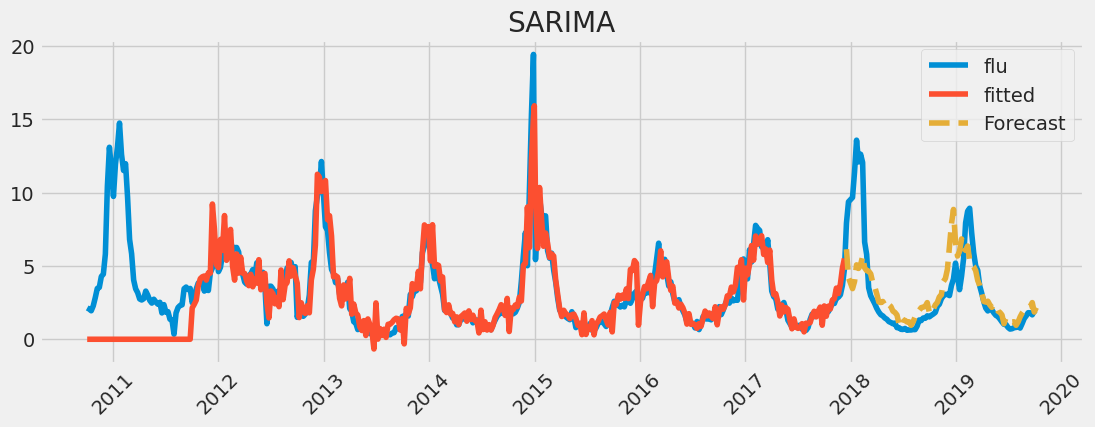

In [60]:
def version_sarima_with_manual(ts):
    """
    SARIMA（statsmodels）
    """
    # 不提前做季节差分，让D=1

    # 周期大小
    periods = 52

    # 数据拆分
    train, test = train_test_split(ts, train_size=0.8)

    # 模型训练
    d, D = 0, 1
    #p, q, P, Q, _ = find_pq_PQ(ts, periods, d=d, D=D)
    #基于上一步中确定的p,q,P,Q，直接代入
    p, q, P, Q = 4,2,0,1
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, periods)).fit(disp=-1)
    print(model.summary())

    # 拟合结果
    fitted = model.fittedvalues

    # 模型预测
    fcst = model.forecast(test.shape[0])

    # 模型评估
    rmse = np.sqrt(mean_squared_error(test, fcst))
    print('RMSE: %.4f' % rmse)

    fcst.index=test.index

     # 可视化
    plt.figure(figsize=(12, 4))
    # ts.plot(label='flu')
    # fitted.plot(label='fitted')
    # fcst.plot(label='forecast',linestyle='--')
    # plt.legend()
    # plt.grid(True)

    plt.plot(ts.index, ts, label='flu')
    plt.plot(fitted.index, fitted, label='fitted')
    plt.plot(fcst.index, fcst, label='Forecast', linestyle='--')
    # plt.plot(predict_sunspots, label='Fit')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title('SARIMA')
    plt.show()
print(ts)
version_sarima_with_manual(ts)